In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("placement_dataset_skewed.xlsx")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Grade10              20000 non-null  float64
 1   Grade12              20000 non-null  float64
 2   CPI                  20000 non-null  float64
 3   Backlogs             20000 non-null  int64  
 4   CodeforcesRating     20000 non-null  int64  
 5   CompetitiveExamRank  20000 non-null  int64  
 6   Projects             20000 non-null  int64  
 7   Internships          20000 non-null  int64  
 8   ExperienceMonths     20000 non-null  int64  
 9   CollegeTier          20000 non-null  object 
 10  CommunicationSkill   20000 non-null  float64
 11  Leadership           20000 non-null  float64
 12  Branch               20000 non-null  object 
 13  HackathonWins        20000 non-null  int64  
 14  ResearchPapers       20000 non-null  int64  
 15  OpenSourceContrib    20000 non-null 

In [3]:
df.head()

,Grade10,Grade12,CPI,Backlogs,CodeforcesRating,CompetitiveExamRank,Projects,Internships,ExperienceMonths,CollegeTier,CommunicationSkill,Leadership,Branch,HackathonWins,ResearchPapers,OpenSourceContrib,PackageLPA
0,73.46,70.36,6.63,1,718,11338,2,0,5,Tier 3,5.5,4.5,ME,0,0,0,13.33
1,76.75,95.48,8.30,0,1177,1959,3,1,6,Tier 2,6.4,7.7,IT,0,0,1,24.70
2,76.64,76.17,7.12,1,1052,13020,2,1,0,Tier 2,6.4,6.2,CHEM,1,0,0,19.16
3,76.41,68.63,6.85,0,1022,3648,1,1,3,Tier 3,7.1,7.4,CIVIL,1,0,0,17.93
4,73.84,78.08,6.03,1,1315,5120,1,0,4,Tier 3,6.3,7.4,ECE,0,0,2,19.97


In [6]:
cat_cols = ['Branch', 'CollegeTier']
for col in cat_cols:
    print(f"All categories in training data for {col}: {df[col].unique()}")


All categories in training data for Branch: ['ME' 'IT' 'CHEM' 'CIVIL' 'ECE' 'CSE' 'DS' 'AI' 'EE' 'BIO']
All categories in training data for CollegeTier: ['Tier 3' 'Tier 2' 'Tier 1']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Grade10              20000 non-null  float64
 1   Grade12              20000 non-null  float64
 2   CPI                  20000 non-null  float64
 3   Backlogs             20000 non-null  int64  
 4   CodeforcesRating     20000 non-null  int64  
 5   CompetitiveExamRank  20000 non-null  int64  
 6   Projects             20000 non-null  int64  
 7   Internships          20000 non-null  int64  
 8   ExperienceMonths     20000 non-null  int64  
 9   CollegeTier          20000 non-null  object 
 10  CommunicationSkill   20000 non-null  float64
 11  Leadership           20000 non-null  float64
 12  Branch               20000 non-null  object 
 13  HackathonWins        20000 non-null  int64  
 14  ResearchPapers       20000 non-null  int64  
 15  OpenSourceContrib    20000 non-null 

In [8]:
df['Branch'].unique()

array(['ME', 'IT', 'CHEM', 'CIVIL', 'ECE', 'CSE', 'DS', 'AI', 'EE', 'BIO'],
      dtype=object)

In [10]:
df['CollegeTier'].unique()

array(['Tier 3', 'Tier 2', 'Tier 1'], dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop=None,sparse_output=False)
cat_cols=['Branch','CollegeTier']
encoded=encoder.fit_transform(df[cat_cols])
encoded_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(cat_cols))
df_new=pd.concat([df.drop(columns=cat_cols),encoded_df],axis=1)

In [12]:
encoded_df.head()

,Branch_AI,Branch_BIO,Branch_CHEM,Branch_CIVIL,Branch_CSE,Branch_DS,Branch_ECE,Branch_EE,Branch_IT,Branch_ME,CollegeTier_Tier 1,CollegeTier_Tier 2,CollegeTier_Tier 3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
df_new

,Grade10,Grade12,CPI,Backlogs,CodeforcesRating,CompetitiveExamRank,Projects,Internships,ExperienceMonths,CommunicationSkill,...,Branch_CIVIL,Branch_CSE,Branch_DS,Branch_ECE,Branch_EE,Branch_IT,Branch_ME,CollegeTier_Tier 1,CollegeTier_Tier 2,CollegeTier_Tier 3
0,73.46,70.36,6.63,1,718,11338,2,0,5,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,76.75,95.48,8.30,0,1177,1959,3,1,6,6.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,76.64,76.17,7.12,1,1052,13020,2,1,0,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,76.41,68.63,6.85,0,1022,3648,1,1,3,7.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73.84,78.08,6.03,1,1315,5120,1,0,4,6.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,70.99,75.74,6.89,0,1183,1906,1,2,9,6.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,79.60,93.84,6.46,1,1212,3510,3,2,0,5.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19997,72.92,70.32,7.38,3,772,1852,3,1,0,7.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19998,79.69,74.19,7.27,1,1600,14885,2,1,2,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [14]:
encoder.get_feature_names_out(cat_cols)

array(['Branch_AI', 'Branch_BIO', 'Branch_CHEM', 'Branch_CIVIL',
       'Branch_CSE', 'Branch_DS', 'Branch_ECE', 'Branch_EE', 'Branch_IT',
       'Branch_ME', 'CollegeTier_Tier 1', 'CollegeTier_Tier 2',
       'CollegeTier_Tier 3'], dtype=object)

In [15]:
df_new.head()

,Grade10,Grade12,CPI,Backlogs,CodeforcesRating,CompetitiveExamRank,Projects,Internships,ExperienceMonths,CommunicationSkill,...,Branch_CIVIL,Branch_CSE,Branch_DS,Branch_ECE,Branch_EE,Branch_IT,Branch_ME,CollegeTier_Tier 1,CollegeTier_Tier 2,CollegeTier_Tier 3
0,73.46,70.36,6.63,1,718,11338,2,0,5,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,76.75,95.48,8.30,0,1177,1959,3,1,6,6.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,76.64,76.17,7.12,1,1052,13020,2,1,0,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,76.41,68.63,6.85,0,1022,3648,1,1,3,7.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73.84,78.08,6.03,1,1315,5120,1,0,4,6.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
df_new['Package']=df['PackageLPA']

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Grade10              20000 non-null  float64
 1   Grade12              20000 non-null  float64
 2   CPI                  20000 non-null  float64
 3   Backlogs             20000 non-null  int64  
 4   CodeforcesRating     20000 non-null  int64  
 5   CompetitiveExamRank  20000 non-null  int64  
 6   Projects             20000 non-null  int64  
 7   Internships          20000 non-null  int64  
 8   ExperienceMonths     20000 non-null  int64  
 9   CommunicationSkill   20000 non-null  float64
 10  Leadership           20000 non-null  float64
 11  HackathonWins        20000 non-null  int64  
 12  ResearchPapers       20000 non-null  int64  
 13  OpenSourceContrib    20000 non-null  int64  
 14  PackageLPA           20000 non-null  float64
 15  Branch_AI            20000 non-null 

In [18]:
df_new.drop('PackageLPA',axis=1,inplace=True)

In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Grade10              20000 non-null  float64
 1   Grade12              20000 non-null  float64
 2   CPI                  20000 non-null  float64
 3   Backlogs             20000 non-null  int64  
 4   CodeforcesRating     20000 non-null  int64  
 5   CompetitiveExamRank  20000 non-null  int64  
 6   Projects             20000 non-null  int64  
 7   Internships          20000 non-null  int64  
 8   ExperienceMonths     20000 non-null  int64  
 9   CommunicationSkill   20000 non-null  float64
 10  Leadership           20000 non-null  float64
 11  HackathonWins        20000 non-null  int64  
 12  ResearchPapers       20000 non-null  int64  
 13  OpenSourceContrib    20000 non-null  int64  
 14  Branch_AI            20000 non-null  float64
 15  Branch_BIO           20000 non-null 

In [20]:
X=df_new.iloc[:,:-1]
X

,Grade10,Grade12,CPI,Backlogs,CodeforcesRating,CompetitiveExamRank,Projects,Internships,ExperienceMonths,CommunicationSkill,...,Branch_CIVIL,Branch_CSE,Branch_DS,Branch_ECE,Branch_EE,Branch_IT,Branch_ME,CollegeTier_Tier 1,CollegeTier_Tier 2,CollegeTier_Tier 3
0,73.46,70.36,6.63,1,718,11338,2,0,5,5.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,76.75,95.48,8.30,0,1177,1959,3,1,6,6.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,76.64,76.17,7.12,1,1052,13020,2,1,0,6.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,76.41,68.63,6.85,0,1022,3648,1,1,3,7.1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,73.84,78.08,6.03,1,1315,5120,1,0,4,6.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,70.99,75.74,6.89,0,1183,1906,1,2,9,6.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,79.60,93.84,6.46,1,1212,3510,3,2,0,5.4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19997,72.92,70.32,7.38,3,772,1852,3,1,0,7.2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
19998,79.69,74.19,7.27,1,1600,14885,2,1,2,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
y=df_new['Package']

In [22]:
y

0        13.33
1        24.70
2        19.16
3        17.93
4        19.97
         ...  
19995    22.77
19996    23.05
19997    21.75
19998    18.08
19999    18.71
Name: Package, Length: 20000, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
LRmodel=LinearRegression(n_jobs=-1)
LRmodel.fit(X_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [26]:
KNNmodel=KNeighborsRegressor(n_neighbors=7,n_jobs=-1)
KNNmodel.fit(X_train_scaled,y_train)


KNeighborsRegressor(n_jobs=-1, n_neighbors=7)

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error
LR_y_pred=LRmodel.predict(X_test_scaled)
KNN_y_pred=KNNmodel.predict(X_test_scaled)


In [28]:
print(f'MAE for linear regression is{mean_absolute_error(y_test,LR_y_pred)}')
print(f'R2 Score for linear regression is{r2_score(y_test,LR_y_pred)}')
print(f'MAE for KNN is{mean_absolute_error(y_test,KNN_y_pred)}')
print(f'R2 Score for KNN is{r2_score(y_test,KNN_y_pred)}')


MAE for linear regression is0.9626883120960836
R2 Score for linear regression is0.8708185838575382
MAE for KNN is1.2946594285714286
R2 Score for KNN is0.7622473205792245


In [29]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=100,max_depth=10,random_state=42)
RF_model.fit(X_train_scaled,y_train)
RF_y_pred=RF_model.predict(X_test_scaled)
print(f'MAE for RF is{mean_absolute_error(y_test,RF_y_pred)}')
print(f'R2 Score for RF is{r2_score(y_test,RF_y_pred)}')


MAE for RF is1.2486141668464712
R2 Score for RF is0.7810429393620753


In [30]:
from scipy.stats import randint

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
param_dist = {
    'n_estimators': randint(100, 500),    
    'max_depth': randint(5, 30),            
    'min_samples_split': randint(2, 10),     
    'min_samples_leaf': randint(1, 10),     
    'max_features': ['auto', 'sqrt', 'log2']
}
random_search = RandomizedSearchCV(
    estimator=RF_model,
    param_distributions=param_dist,
    n_iter=50,               # number of random combinations
    cv=5,                    # 5-fold cross-validation
    scoring='r2',            # evaluation metric
    n_jobs=-1,
    random_state=42,
    verbose=2
)
random_search.fit(X_train, y_train)
print("Best hyperparameters:", random_search.best_params_)
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R2: {r2:.2f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\sjija\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sjija\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sjija\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\sjija\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\sjija\anaconda3\Lib\site-package

Best hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 414}
Test MSE: 559.16
Test R2: 0.00


In [66]:
df_sorted=df_new.sort_values(by='CompetitiveRank')

In [67]:
df_sorted

,CGPA,Internships,Projects,CodeforcesRating,CommunicationSkill,ExperienceMonths,Age,Grade10,Grade12,Backlogs,...,Branch_CE,Branch_CSE,Branch_ECE,Branch_ME,CollegeTag_Tier1,CollegeTag_Tier2,CollegeTag_Tier3,Gender_Female,Gender_Male,Package
19427,8.10,2,0,884,9,16,23,88.4,93.9,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,97.52
19289,8.59,1,1,1009,5,41,25,96.4,79.7,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,58.57
11034,7.12,2,5,1598,8,45,25,84.9,84.1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,57.18
5236,6.60,2,2,1669,9,26,23,83.1,72.8,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,68.61
717,8.15,1,2,1715,6,36,24,90.4,82.6,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17812,7.59,2,2,1256,3,41,20,79.1,93.6,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,63.55
6982,7.72,2,2,1387,6,39,23,83.5,89.9,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,40.12
10193,7.98,0,3,1510,3,18,22,96.3,77.5,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,40.13
19558,5.51,1,2,1191,7,39,26,90.1,86.5,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.50


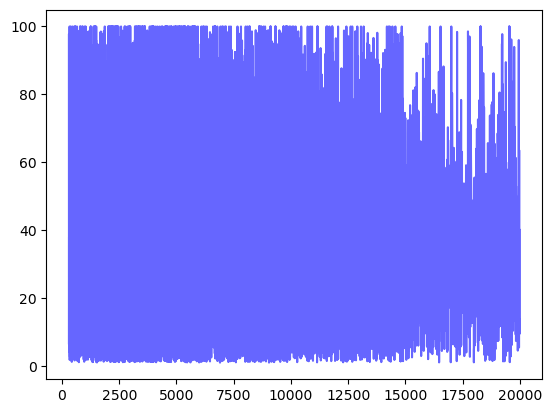

In [87]:
plt.plot(df_sorted["CompetitiveRank"], df_sorted["Package"], color="blue", alpha=0.6)

In [24]:
from sklearn.metrics import mean_squared_error
print(f'MSE for RF is{mean_squared_error(y_test,RF_y_pred)}')


MSE for RF is26.871014825532864


In [34]:
import pickle
#with open('random_forest_model.pkl', 'wb') as f:
#    pickle.dump(best_rf, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('OHE.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [37]:
import pandas as pd
import pickle
import sys,json


#with open('random_forest_model.pkl', 'rb') as f:
 #   RF_model = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('OHE.pkl', 'rb') as f:
    encoder = pickle.load(f)
neinput = [
    [7.76, 0, 3, 16459, 'ME', 757, 55, 10, 18, 'IIT', 93.6, 95, 0, 'M']
]
new_input = pd.DataFrame([{
    "Grade10": 90,
    "Grade12": 88,
    "CPI": 9.0,
    "Backlogs": 0,
    "CodeforcesRating": 2200,
    "CompetitiveExamRank": 1500,
    "Projects": 5,
    "Internships": 2,
    "ExperienceMonths": 8,
    "CollegeTier": "Tier 1",
    "CommunicationSkill": 8.5,
    "Leadership": 9,
    "Branch": "CSE",
    "HackathonWins": 1,
    "ResearchPapers": 1,
    "OpenSourceContrib": 4
}])

columns = ['CGPA', 'Internships', 'Projects', 'CompetitiveRank', 'Branch',
           'CodeforcesRating', 'CommunicationSkill', 'ExperienceMonths', 'Age',
           'CollegeTag', 'Grade10', 'Grade12', 'Backlogs', 'Gender']

df_in = pd.DataFrame(new_input)

numeric_cols = [
    'Grade10',
    'Grade12',
    'CPI',
    'Backlogs',
    'CodeforcesRating',
    'CompetitiveExamRank',
    'Projects',
    'Internships',
    'ExperienceMonths',
    'HackathonWins',
    'ResearchPapers',
    'OpenSourceContrib',
    'CommunicationSkill',
    'Leadership',
    'PackageLPA'
]

encoded_input = encoder.transform(df_in[cat_cols])
encoded_input_df = pd.DataFrame(encoded_input, columns=encoder.get_feature_names_out(cat_cols))
input_combined = pd.concat([df_in[numeric_cols], encoded_input_df], axis=1)
input_combined = scaler.transform(input_combined)
predicted_package = RF_model.predict(input_combined)

print(f"Predicted Package: {predicted_package[0]:.2f} LPA")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- CollegeTier
Feature names seen at fit time, yet now missing:
- CollegeTag
- Gender


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [82]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  
    Dense(32, activation="relu"), 
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),  
    Dense(4,activation='relu'),                       
    Dense(1, activation="linear")                          
])

c:\Users\sjija\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(
    optimizer="adam",
    loss="mse",   # mean squared error for regression
    metrics=["mae"]  # mean absolute error
)

In [86]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    batch_size=16,
    verbose=1
)

Epoch 1/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 827.4612 - mae: 21.6827 - val_loss: 600.8027 - val_mae: 20.0239
Epoch 2/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 620.0560 - mae: 20.2132 - val_loss: 590.5329 - val_mae: 19.9549
Epoch 3/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 606.8486 - mae: 20.0270 - val_loss: 580.8479 - val_mae: 19.6571
Epoch 4/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 600.9204 - mae: 20.0004 - val_loss: 575.5006 - val_mae: 19.6182
Epoch 5/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 598.3239 - mae: 19.9639 - val_loss: 580.5966 - val_mae: 19.9396
Epoch 6/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 594.8011 - mae: 19.8859 - val_loss: 576.4227 - val_mae: 19.6290
Epoch 7/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 592.6636 - mae: 19.8590 - val_loss: 576.5939 - val_mae: 19.9013
Epoch 8/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 591.7248 - mae: 19.8523 - val_loss: 572.7161 - val_mae: 

In [54]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib


df = pd.read_excel("ML_Training_dataset_20000.xlsx")
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())


target = 'PackageLPA'

numeric_cols = [
    'Grade10', 'Grade12', 'CPI', 'Backlogs', 'CodeforcesRating',
    'CompetitiveExamRank', 'Projects', 'Internships', 'ExperienceMonths',
    'HackathonWins', 'ResearchPapers', 'OpenSourceContrib',
    'CommunicationSkill', 'Leadership'
]

cat_cols = ['Branch', 'CollegeTier'] 

X = df[numeric_cols + cat_cols]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


pipeline.fit(X_train, y_train)
print("\n✅ Model training complete!")

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📊 Model Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

joblib.dump(pipeline, "placement_package_predictor.pkl")
print("\n💾 Model saved as 'placement_package_predictor.pkl'")

new_candidate = pd.DataFrame([{
    'Grade10': 99,
    'Grade12': 95,
    'CPI': 8.9,
    'Backlogs': 0,
    'CodeforcesRating': 4191,
    'CompetitiveExamRank': 59,
    'Projects': 60,
    'Internships': 0,
    'ExperienceMonths': 8,
    'HackathonWins': 1,
    'ResearchPapers': 0,
    'OpenSourceContrib': 0,
    'CommunicationSkill': 10,
    'Leadership': 5,
    'Branch': 'CSE',
    'CollegeTier': 'Tier 3'
}])

predicted_package = pipeline.predict(new_candidate)[0]
print(f"\n💰 Predicted Package for Candidate: {predicted_package:.2f} LPA")


Dataset shape: (20000, 17)
Columns: ['Grade10', 'Grade12', 'CPI', 'Backlogs', 'CodeforcesRating', 'CompetitiveExamRank', 'Projects', 'Internships', 'ExperienceMonths', 'CollegeTier', 'CommunicationSkill', 'Leadership', 'Branch', 'HackathonWins', 'ResearchPapers', 'OpenSourceContrib', 'PackageLPA']

✅ Model training complete!

📊 Model Evaluation:
R² Score: 0.871
MAE: 0.961
RMSE: 1.202

💾 Model saved as 'placement_package_predictor.pkl'

💰 Predicted Package for Candidate: 55.29 LPA


In [55]:
import joblib
import pandas as pd

pipeline = joblib.load("placement_package_predictor.pkl")

new_candidate = pd.DataFrame([{
    'Grade10': 90, 'Grade12': 88, 'CPI': 8.9, 'Backlogs': 0,
    'CodeforcesRating': 1600, 'CompetitiveExamRank': 3200,
    'Projects': 4, 'Internships': 2, 'ExperienceMonths': 6,
    'HackathonWins': 1, 'ResearchPapers': 0, 'OpenSourceContrib': 3,
    'CommunicationSkill': 8, 'Leadership': 7,
    'Branch': 'CSE', 'CollegeTier': 'Tier 1'
}])

# Predict package
predicted_package = pipeline.predict(new_candidate)[0]
print(f"Predicted Package: {predicted_package:.2f} LPA")


Predicted Package: 29.83 LPA
